**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import homogeneity_score


%matplotlib inline


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,25):
  Cluster = KMeans(n_clusters=i,init='k-means++',random_state=42)
  Cluster.fit(trainX)
  wcss.append(Cluster.inertia_)



In [ ]:
plt.plot(range(1,25),wcss)
plt.show()

In [ ]:
kmean = KMeans(n_clusters=10,init='k-means++',random_state=42)
y = kmean.fit_predict(trainX)
y

In [ ]:
plt.scatter(trainX[y == 0, 0], trainX[y == 0, 1],s=100)
plt.scatter(trainX[y == 1, 0], trainX[y == 1, 1],s=100)
plt.scatter(trainX[y == 2, 0], trainX[y == 2, 1],s=100)
plt.scatter(trainX[y == 3, 0], trainX[y == 3, 1],s=100)
plt.scatter(trainX[y == 4, 0], trainX[y == 4, 1],s=100)
plt.scatter(trainX[y == 5, 0], trainX[y == 5, 1],s=100)
plt.scatter(trainX[y == 5, 0], trainX[y == 5, 1],s=100)
plt.scatter(trainX[y == 6, 0], trainX[y == 6, 1],s=100)
plt.scatter(trainX[y == 7, 0], trainX[y == 7, 1],s=100)
plt.scatter(trainX[y == 8, 0], trainX[y == 8, 1],s=100)
plt.scatter(trainX[y == 9, 0], trainX[y == 9, 1],s=100)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics.cluster import homogeneity_score
print(homogeneity_score(trainy,y))

0.5002897078298034


In [ ]:
plt.scatter(trainX[:, 0], trainX[:, 1], c=y, s=50, cmap='plasma')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

In [12]:
#implement elbow method from scratch
def elbow(X):
  er = []
  for i in range(2,15):
    model = kmeans(i,1,2)
    model.fit(trainX)
    c = model.centroids
    dist = ((X - c[:, np.newaxis])**2).sum(axis=2)
    dist = sum(dist)
    er.append(dist)
  return er



In [26]:
err = elbow(trainX)
k = list(range(2,15))


[[9.34921345e-04 5.56887931e-03 3.46733873e-02 ... 2.76663550e+00
  8.33584001e-01 7.23954311e-02]
 [2.04926431e-04 5.98385180e-03 3.04930530e-02 ... 2.74580925e+00
  8.48026558e-01 7.50440592e-02]]
END###################################
(2, 49000)
[[1.41616896e-03 6.64983683e-03 2.86928145e-02 ... 2.76547011e+00
  7.94532356e-01 8.26303799e-02]
 [6.09681746e-05 3.23131325e-03 2.60334106e-02 ... 2.70149982e+00
  8.05328618e-01 6.90769418e-02]
 [2.44543620e-04 7.45858042e-03 4.30396772e-02 ... 2.80204194e+00
  9.22235129e-01 6.95115241e-02]]
END###################################
(3, 49000)
[[1.31546493e-03 4.85077695e-03 2.55693497e-02 ... 2.76321631e+00
  8.18383622e-01 7.55570172e-02]
 [2.45138094e-04 2.94165713e-03 1.96110476e-02 ... 2.78877268e+00
  8.18025821e-01 6.14479490e-02]
 [4.86263068e-04 5.42993760e-03 2.68255126e-02 ... 2.66002107e+00
  9.93516492e-01 7.56139071e-02]
 [2.44698206e-04 9.86949429e-03 5.83197390e-02 ... 2.81378467e+00
  7.31973899e-01 8.22185971e-02]]
END###

In [25]:
err[10]

4112892565622.456

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: ignored

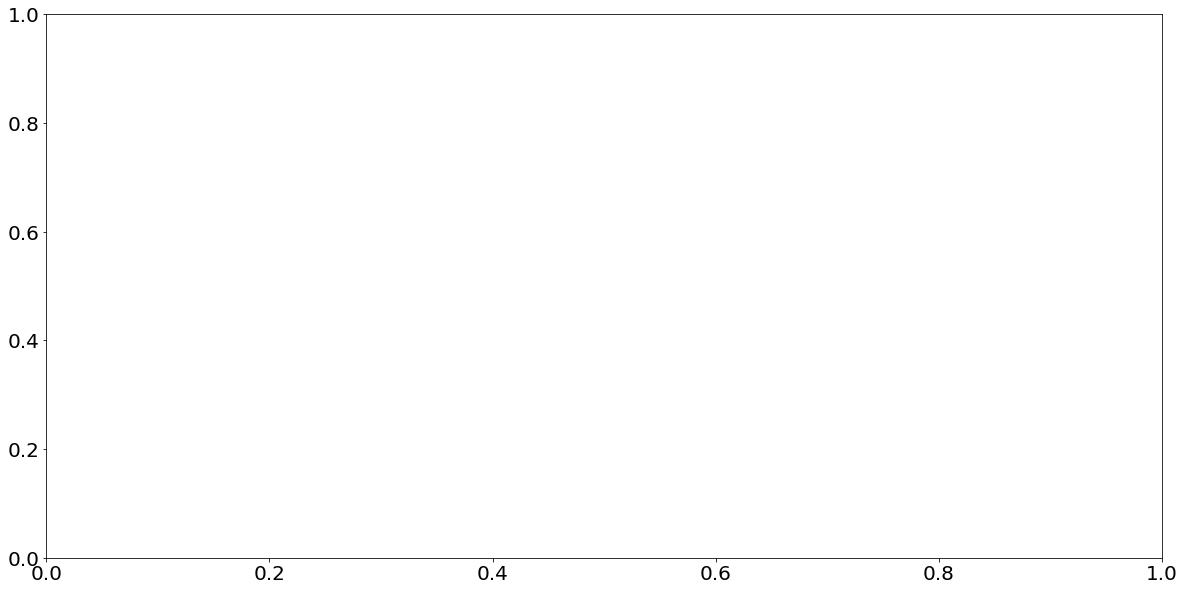

In [15]:
# k = list(range(2,6)) # Range of 'k'
plt.figure(figsize=(20,10)) # Size of figure is adjusted.
plt.xticks(fontsize=20) # Size of number labels on x-axis is adjusted.
plt.yticks(fontsize=20) # Size of number labels on y-axis is adjusted.
plt.plot(k,err) # Graph is plotted.
plt.xlabel('Value of k',fontsize = 25) # x-axis is labelled.
plt.ylabel('Value of Epsilon',fontsize = 25) 

In [ ]:
#implement silhouette method from scratch
def silhouette():



In [ ]:
#implement Kmeans from scratch
# class Kmeans:

#   def __init__(self):
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
style.use('ggplot')

class K_Means:
    def __init__(self, d,c,k=10,tol=0.001, max_iter=100):
        self.k = k
        self.k = d
        self.k = c
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = []
        np.random.seed(42)
        # centroids = []
        m = np.shape(data)[0]
        ct = forgy_initialize(data,10)
        for i in range(0,10):
             r = np.random.randint(0, m-1)
             self.centroids.append(ct[i])

        # for i in range(self.k):
        #     self.centroids[i] = data[i+100]
            
        # print(self.centroids)
        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(10):
                self.classifications[i] = []
                # print(self.classifications)

            for featureset in data:
                # distances = [np.sqrt((np.square(self.centroids[:,np.newaxis]-featureset).sum(axis=1)))]
                distances = [np.linalg.norm(featureset-centroid) for centroid in self.centroids]
                # print(distances)
                classification = distances.index(min(distances))
                # print(self.classifications[8])
                self.classifications[int(classification)].append(featureset)

            prev_centroids = self.centroids

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in range(0,10):
                print("hii ")
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                print(original_centroid)
                try:
                  if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    # print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    print('oo')
                    optimized = False
                except:
                  1    

            if optimized:
                break

    def predict(self,data):
        # distances = [np.sqrt((np.square(self.centroids[:,np.newaxis]-featureset).sum(axis=1)))]
        distances = [np.linalg.norm(data-centroid) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification  

In [76]:
#implement Kmeans++ from scratch
# class Kmeansplusplus:

#   def __init__(self,X,k):

def Kmeansplusplus(X,k):
    centroids = [] 
    centroids.append(data[np.random.randint( 
            data.shape[0]), :]) 
    ) 
   
    ## compute remaining k - 1 centroids 
    for c_id in range(k - 1): 
          
        ## initialize a list to store distances of data 
        ## points from nearest centroid 
        dist = [] 
        for i in range(data.shape[0]): 
            point = data[i, :] 
            d = sys.maxsize 
              
            ## compute distance of 'point' from each of the previously 
            ## selected centroid and store the minimum distance 
            for j in range(len(centroids)): 
                temp_dist = distance(point, centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
              
        ## select data point with maximum distance as our next centroid 
        dist = np.array(dist) 
        next_centroid = data[np.argmax(dist), :] 
        centroids.append(next_centroid) 
        dist = [] 
        # plot(data, np.array(centroids)) 
    return centroids 
 

SyntaxError: ignored

In [8]:

#kmeans (param k)
class kmeans:

    def __init__(self, k,d,c_init):

        self.k = k
        self.d = d
        self.c_init = c_init
        self.centroids = None
        self.labels = None
    # def Kmeansplusplus(self,X):









    def fit(self, X, max_iter=1000, seed=None):


        # Convert training data to numpy array and find max values for RNG
        # X = np.array(X)
        max_val = X.max()

        # Initialize centroids and prepare to count iterations
        if self.c_init == 1:
            centroids = np.array([max_val * np.random.random_sample(X.shape[1])for i in range(self.k)])
        if self.c_init == 2:
            centroids = forgy_initialize(X,self.k)
        if self.c_init == 2:
            centroids = random_partition(X,self.k)
        if self.c_init == 3:
            centroids = Kmeansplusplus(X,self.k)  
              
        print(centroids)
        print("END###################################")    
        p_centroids = np.full(centroids.shape, -1)
        iterations = 0
        nd =0
        while not self.Reached_End(p_centroids, centroids, iterations, max_iter):
            # Update previous centroids and iterations
            p_centroids = np.copy(centroids)
            iterations = iterations + 1

            if self.d ==1:
                dist = ((X - centroids[:, np.newaxis])**2).sum(axis=2)
            if self.d == 2:
                dist = np.sqrt((np.square(centroids[:,np.newaxis]-X).sum(axis=2)))  
            if self.d == 3:
                dist = np.abs(centroids[:,None] - X).sum(-1)      
            nd = nd+1           
            #n print(dist)
            labels = np.argmin(dist, axis=0)

            # Update all centroids
            self.Cal_Centroid(X, centroids, labels, max_val)

        # Save centroids and labels
        self.centroids = np.copy(centroids)
        self.labels = np.copy(labels)
        print(dist.shape)
        # return self.labelsr

    def predict(self, X):

        if self.centroids is None:
            raise ModelNotFitted("Model needs to be fitted to data")

        # Find distance from points to centroids and save closest as labels
        if self.d == 1:
            dist = ((X - self.centroids[:, np.newaxis])**2).sum(axis=2)
        if self.d == 2:
            dist = np.sqrt((np.square(self.centroids[:,np.newaxis]-X).sum(axis=2)))    
        if self.d == 3:
            dist = np.abs(centroids[:,None] - X).sum(-1)      
        labels = np.argmin(dist, axis=0)
        print(labels)

        return labels

    def Reached_End(self, p_centroids, centroids, iterations, max_iter):

        # Reshape for comparison
        p_centroids = p_centroids.reshape(-1)
        centroids = centroids.reshape(-1)

        # Return true if centroids didn't change or max iterations met
        if np.allclose(p_centroids, centroids, atol=0.0001) or iterations >= max_iter:
            return True

        # Return false if conditions not met
        return False

    def Cal_Centroid(self, X, centroids, labels, max_val):
        """Updates centroids every iteration."""
        # If any centroid has no points, randomly reassign
        empty_centroids = [i for i in range(self.k) if i not in np.unique(labels)]
        for i in empty_centroids:
            centroids[i] = max_val * np.random.random_sample(X.shape[1])

        for i in range(len(centroids)):
            if i not in empty_centroids:
                centroids[i] = np.array(X[np.where(labels == i)].mean(axis=0))


class ModelNotFitted(Exception):
    """
    Exception raised when attempting to call a method before a model is fitted.
    """


In [4]:
def forgy_initialize(X, k):
    return X[np.random.choice(range(X.shape[0]), replace = False, size = k), :]

In [5]:
def random_partition(X, k):
      
    indices = np.random.choice(range(0, k), replace = True, size = X.shape[0])
    mean = []
    for count in range(k):
        mean.append(X[indices == count].mean(axis=0))
        
    return np.concatenate([val[ None, :] for val in mean], axis = 0)

In [3]:
# Dataprocessing.
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X = np.concatenate((trainX,testX))
Y = np.concatenate((trainy,testy))
trainX,trainy,testX,testy = train_test_split(X,Y,test_size = 0.30, random_state=42)
trainX = trainX.reshape(-1,trainX.shape[1]*trainX.shape[2])
trainy = trainy.reshape(-1,trainy.shape[1]*trainy.shape[2])
trainX = trainX.astype('float64')
trainy = trainy.astype('float64')
testX = testX.astype('float64')
testy = testy.astype('float64')

print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

4423680/4422102 [==============================] - 0s 0us/step
(49000, 784)
(21000, 784)
(49000,)
(21000,)


In [ ]:
random_partition(trainy,10)

In [86]:
model = kmeans(10,1,2)
model.fit(trainX)

# for centroid in model.centroids:
#     plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
#                 marker="o", s=150, linewidths=5)

# for classification in model.classifications:
#     color = colors[classification]
#     for featureset in model.classifications[classification]:
#         plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
# for i in range(0,10):
#     color = colors[i]
#     for featureset in model.classifications[i]:
#         plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
# plt.show()


[[0.00000000e+00 3.09789343e-03 1.87938868e-02 ... 2.85873606e+00
  7.95332507e-01 3.92399835e-02]
 [1.64406083e-03 5.95972051e-03 2.79490341e-02 ... 3.03164817e+00
  9.97944924e-01 8.87792848e-02]
 [3.26197757e-03 9.78593272e-03 3.69011213e-02 ... 2.43873598e+00
  6.57084608e-01 3.36391437e-02]
 ...
 [2.00601805e-04 9.02708124e-03 5.31594784e-02 ... 2.53921765e+00
  8.68405216e-01 1.45235707e-01]
 [0.00000000e+00 1.37791287e-02 8.10536981e-02 ... 3.12482270e+00
  9.42046606e-01 4.88348531e-02]
 [0.00000000e+00 4.94845361e-03 1.91752577e-02 ... 2.65463918e+00
  7.92577320e-01 1.12577320e-01]]
END###################################
(10, 49000)


In [ ]:
model = K_Means(1,1,10)
model.fit(trainX)

In [ ]:
testX.shape

In [ ]:
p = []
# p = model.predict(trainy)
for i in range(len(trainy)):
  p.append(model.predict(trainy[i]))
# for i in range(len(trainX)):  
#   print(testy[i],p[i])

# (p.shape)
# trainX.shape
# model.classifications

In [ ]:
# p1 = p.flatten()
p1 = np.array(p)
p2 = p1.flatten()
p2[0]

1

In [ ]:
from sklearn.metrics.cluster import homogeneity_score
print(homogeneity_score(testy,p2))


0.5017072841471376


In [ ]:
a=0
for i in range(len(trainX)):
  print(p[i],int(testX[i]) )
  if p[i] == int(testX[i]):
    a = a+1


In [ ]:
from sklearn.metrics import accuracy_score

a = accuracy_score(testX,p)
a*100
m  

In [ ]:
trainX = trainX[:10000]
l = model.labels
l = l[:10000]


In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(trainX[:,0],trainX[:,1])
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
xe = tsne.fit_transform(trainX)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


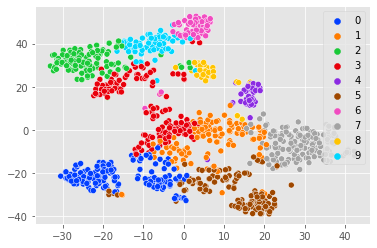

In [ ]:
palette = sns.color_palette("bright",10)
sns.scatterplot(xe[:,0],xe[:,1],hue=l,legend='full',palette=palette)

Part2

In [65]:
data = pd.read_csv("data.csv",header = None)
data[191] = data[191].str.replace(']','').astype(np.float64)
data[0] = data[0].str.replace('[','').astype(np.float64)
X = np.array(data.iloc[:,:192])
Y = np.array(data.iloc[:,192])
trainX,testX,trainY,testY = train_test_split(X.astype('float32'),Y,test_size = 0.30,random_state=42)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(42000, 192)
(42000,)
(18000, 192)
(18000,)


In [ ]:
LS_model = kmeans(10,1,2)
LS_model.fit(trainX)

In [ ]:
LS_p = []
# p = model.predict(trainy)
for i in range(len(testX)):
  LS_p.append(LS_model.predict(testX[i]))

In [75]:
ll = np.array(LS_p)
ll = ll.flatten()
print(homogeneity_score(testY,ll))

0.4733123810304045
